#1. BeeVision is planning to build an affect-aware system that can perceive interlocutors' emotions during a social interaction through their facial expressions. Your task is to help the company build a model that can recognize emotions from facial expressions. You can use one of (or both) datasets prepared for you in https://bit.ly/COMP7116001Dataset.
a) [LO 2, 20 points] Build an emotion recognition model by using any machine learning techniques/algorithms of your choice. Explain comprehensively how the algorithms work and why you choose the algorithms. Moreover, explain thoroughly the features and descriptors that you implemented!

b) [LO 2, 5 points] Evaluate your model using evaluation metrics of your choice and explain the results!


I'll be making a facial expression using SVM. SVM or a Support Vector Machines is a algorithm used for both regression and classification problems.The goal of SVM is to find a hyperplane that connects the data points to their potential classes in an n-dimensional space. SVM for classifcaton will find a plane with the greatest margin, i.e. the greatest distance between data points from both classes. SVM uses 'kernel', a set of mathematical functions.

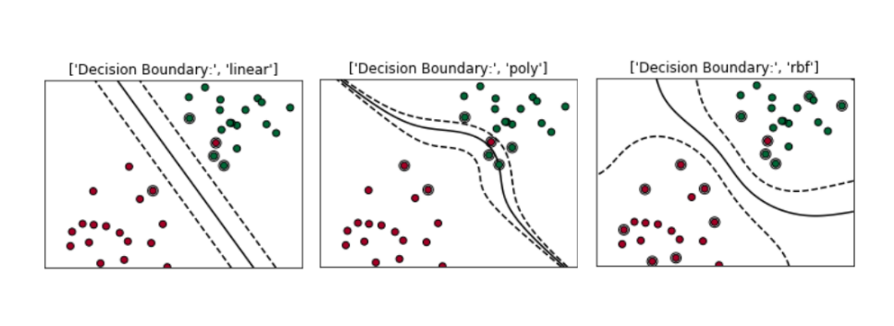

The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions.
Two kernel we'll be using is :
1. Polynomial kernel

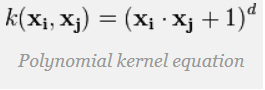
2. Gaussian radial basis function (RBF)

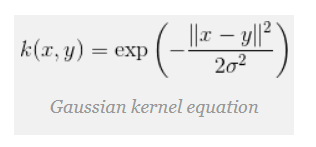


The reason for me using a svm model for this problem is :


*   SVM input is very flexible. SVM able to use data such as image, text, audio
*   Overfitting is not a problem with SVMs in general.




#Import Libraries and dataset

In [2]:
import numpy as np #
import os
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize 
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

* Pandas are used to convert datasets to dataframe  
* Numpy is used for data manipulation
* OS used to browse files 
* cv2 for image import 
* resize to resize the image 
* SVM and gridsearch cv as models for classification 
* Classification report and confusion matrix as metrics evaluation model

In [3]:
#Declare directories
train_dir = "/content/drive/MyDrive/dataset/Emotions/2/train"
test_dir = "/content/drive/MyDrive/dataset/Emotions/2/test"

In [4]:
emotion = os.listdir(train_dir) # list directories in emotions folder
train_data = []
train_target = []
for index, emotions in enumerate(emotion):
    full_name_path = train_dir+'/'+ emotions
    
    for image_path in os.listdir(full_name_path):
        full_image_path = full_name_path+'/'+image_path
        img_gray = cv2.imread(full_image_path,0) #read the image and change into grasycale
        img_gray=resize(img_gray,(48,48,3))#change image size
        train_data.append(img_gray.flatten()) # append the flatten pixel values
        train_target.append(index)

In this part we will input the image into a list. we will change the image into a grayscale and resize the image into 48,48,3. after that we will flatten and append into train_data. For the label we will append into train_target

In [5]:
flat_data=np.array(train_data)
target=np.array(train_target)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data

now we will change the list into an array and change into dataframe and alocate into x_train and y_train

#Build the model

In [6]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']} 
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In this part, we will declare mutiple parameter C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly'] and use GridSearchCV will find the best parameter to use.

In [ ]:
model.fit(x_train,y_train)

Then we will fit with the x and y

#Evaluation

In [ ]:
emotion = os.listdir(test_dir) # list directories in emotions folder
train_data = []
test_data = []
test_target = []
for index, emotions in enumerate(emotion):
    full_name_path = test_dir+'/'+ emotions
    for image_path in os.listdir(full_name_path):
        full_image_path = full_name_path+'/'+image_path
        img_gray = cv2.imread(full_image_path,0) #read the image and change into grasycale
        img_gray=resize(img_gray,(48,48,3))#change image size
        test_data.append(img_gray.flatten()) # append the flatten pixel values
        test_target.append(index)

In [ ]:
flat_data=np.array(test_data)
target=np.array(test_target)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

We will now do the same to the test dataset

In [ ]:
y_pred=model.predict(x_test)
target_names = ['Anger', 'Contempt', 'Disgust','fear','happy','sadness','surprise']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
confusion_matrix(y_test, y_pred)

#2. Recognize the person's emotions in the picture provided in https://bit.ly/COMP7116001Dataset2 by using the model you have trained and evaluated in no 1.
a) [LO 3, 10 points] Detect the face within the image using the Viola-Jones algorithm and crop the face. Explain comprehensively how the algorithms work!

b) [LO 1, 10 points] Prepare the images (cropped face) using any image processing techniques that you think is necessary to improve the quality of the images! Explain your choice. Moreover, describe the computational principles of the image processing techniques applied in your case.

#3. BeeVision's second project is to build a Dog and Cat recognizer using the dataset provided in https://www.kaggle.com/c/dogs-vs-cats/
a) [LO 2, 15 points] Build Visual Vocabulary from the dataset using the Visual Bag of Words algorithm! Explain comprehensively how the algorithms work!

b) [LO 3, 10 points] Use K-NN to predict the object (i.e., dog or cat) and explain the
results!

The Viola Jones algorithm is named after two computer vision researchers, Paul Viola and Michael Jones, who proposed the method in their work "Rapid Object Detection Using a Boosted Cascade of Simple Features" in 2001. The Viola-Jones Object Detection Framework can recognize things in photos rapidly and correctly, and it works especially well with the human face. Given an image (this technique only works with grayscale images), the program analyses numerous smaller subregions and attempts to discover a face by looking for certain attributes in each subregion. Because an image may have several faces of differing sizes, it must be checked in a variety of scales and positions. Viola and Jones detected faces using Haar-like properties in this approach.

The Viola Jones algorithm consists of four major steps, which we will go over in the sections that follow:



1.   Selecting Haar-like features
    Digital image features called Haar-like features are employed in object recognition.Haar-like features contains darker and ligher part.  Viola and Jones observed three sorts of Haar-like features in their research:


*   Aspects of the edge
*   Line-features
* Features on all four sides

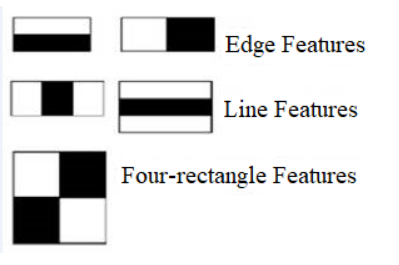

Edge features and Line features are useful for detecting edges and lines respectively. The four-sided features are used for finding diagonal features.



2.   Creating a complete image
3. AdaBoost training is being conducted.
4. Cascades of classifiers




In [ ]:
!pip install opencv-contrib-python==3.4.2.17

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
print(cv2.__version__)

In [ ]:
train_path="/content/drive/MyDrive/dataset/catvsdogs1/train"
test_path="/content/drive/MyDrive/dataset/catvsdogs1/test1"
class_names=['Cat','Dog']

In [ ]:
image_paths= []
person_name = os.listdir(train_path)
for index, person_names in enumerate(person_name):
    full_name_path = train_path+'/'+ person_names
    image_paths.append(full_name_path)

In [ ]:
image_classes_0=[0]*(len(image_paths)//2)
image_classes_1=[1]*(len(image_paths)//2)
image_classes=image_classes_0+image_classes_1

In [ ]:
D=[]
for i in range(len(image_paths)):
   D.append((image_paths[i],image_classes[i]))

image_paths, y_train = zip(*D)

In [ ]:
des_list=[]
orb=cv2.ORB_create()

In [ ]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [ ]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [ ]:
descriptors.shape

In [ ]:
descriptors_float=descriptors.astype(float)

In [ ]:
descriptors_float

In [ ]:
from scipy.cluster.vq import kmeans,vq

In [ ]:
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words

In [ ]:
visual_words = kmeans(150, descriptors_float) 

In [ ]:
im_features=np.zeros((len(image_paths),150),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],visual_words)
    for w in words:
        im_features[i][w]+=1

In [ ]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))